
<div style="text-align:center;line-height:300%;">
<font face="XB Zar" size=7>
<h4>Distance\similarity detection</h4>
  </font>
</div>


<div style="text-align:center;direction:ltr;line-height:300%;">
<font face="XB Zar" size=3>
<h1> writen by Hesam  </h1>
  </font>
</div>







this note book is to show multiple way of calulateing distance or similarity of stock time series

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading data

you can read on how we ghatered data on Dataset folder and its nootebook


**data**:
1. Interpolated Price Panel:
    - adj close price interpolated cosisting of top 50 active compony
2. top_50_inc :
    - indicator of these compony
2. en_stock :
    - English symnol name of these compony

we only use data frome from `2018-01-01=1396-10-11` to `1402-06-13=2023-09-04`

In [2]:
df_price = pd.read_excel('./Interpolated Price Panel.xlsx',index_col=[0])
df_price = df_price['2018-01-01':]
df_ind = pd.read_excel('./top_50_inc.xlsx',index_col=[0])
en_stock = np.load('./EN_stock.npy')
df_volume = pd.read_excel('volume panel.xlsx',index_col=[0])
df_volume = df_volume['2018-01-01':]

In [3]:
df_volume.reindex(columns=df_price.columns)

,اخابر,اپال,بفجر,بوعلی,تاصیکو,تاپیکو,تیپیکو,جم,جم پیلن,حکشتی,...,وصندوق,وغدیر,ومعادن,وپارس,وپاسار,کالا,کاوه,کرماشا,کچاد,کگل
2018-01-01,NaN,NaN,876485.0,NaN,NaN,5881038.0,1566767.0,607187.0,NaN,138496.0,...,2478718.0,14135658.0,12872631.0,NaN,NaN,NaN,2783528.0,411147.0,8953222.0,10790684.0
2018-01-02,1665229.0,NaN,296935.0,NaN,NaN,8168621.0,786655.0,492657.0,NaN,90369.0,...,3997241.0,5781956.0,10684030.0,NaN,NaN,NaN,2477324.0,1659651.0,10359779.0,10691174.0
2018-01-03,3740306.0,NaN,1077537.0,NaN,NaN,4972704.0,211203.0,1766745.0,NaN,189505.0,...,4920494.0,2771729.0,11071407.0,NaN,NaN,NaN,4319249.0,1063489.0,7590232.0,5812012.0
2018-01-06,590168.0,NaN,25872.0,NaN,NaN,3614055.0,352113.0,1173810.0,NaN,322176.0,...,2163905.0,1677612.0,5294989.0,NaN,NaN,NaN,2773682.0,379454.0,4619426.0,3580027.0
2018-01-07,1881918.0,NaN,14401.0,NaN,NaN,5862709.0,458422.0,64229.0,NaN,188586.0,...,NaN,2696903.0,5280077.0,NaN,NaN,NaN,3020474.0,1348199.0,5063205.0,10217561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,29156910.0,866432.0,228138.0,2836356.0,NaN,14505331.0,1044617.0,244251.0,162083.0,9469471.0,...,371485.0,13802501.0,15307733.0,27317907.0,15125153.0,17454791.0,3679709.0,4643059.0,12765623.0,27142463.0
2023-08-30,49792355.0,1570506.0,429899.0,1896661.0,NaN,16994952.0,1240900.0,266619.0,66145.0,23643181.0,...,4649983.0,6545910.0,25847003.0,62546939.0,37597359.0,17701097.0,2945644.0,3178438.0,10554916.0,26359627.0
2023-09-02,24297206.0,1367357.0,547677.0,2183751.0,NaN,8127443.0,1131825.0,247615.0,31855.0,9399165.0,...,16070677.0,16382140.0,30936706.0,53115561.0,37531030.0,12839772.0,3767869.0,2766476.0,12361538.0,49804034.0
2023-09-03,18853886.0,1149976.0,2714672.0,2946048.0,NaN,6375049.0,675818.0,281472.0,137316.0,13338929.0,...,9437751.0,19360865.0,27174674.0,24454407.0,116387678.0,15565528.0,3432295.0,2075128.0,10722297.0,36136204.0


changing the columns to their English name since matplotlib doesn’t support Persian

and then cacluating their return 

$$ r(t) = \frac{P(t) - P(t-1)}{P(t-1)}\times 100$$

In [4]:
df_price.columns = en_stock
df_volume.columns = en_stock
df_price_return = df_price.pct_change()*100
df_ind_return = df_ind.pct_change()*100

C:\Users\Hesam\AppData\Local\Temp\ipykernel_30900\30734430.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_price_return = df_price.pct_change()*100


In [5]:
df_price_return

,akhaber,opal,bi_fagr,booali,tasico,tapico,tipico,jam,jam_pilen,he_kashti,...,ve_sandoq,ve_ghadir,ve_maaden,ve_pars,ve_pasar,kala,kaveh,kermasha,ke_chad,ke_gol
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,-0.011597,NaN,0.000000,NaN,NaN,0.335570,-1.195219,0.450450,NaN,-0.106045,...,0.204082,0.849858,0.000000,-0.022979,0.036163,NaN,0.000000,0.526316,0.636943,0.404858
2018-01-03,0.417537,NaN,0.000000,NaN,NaN,-0.501672,-0.268817,0.122299,NaN,-0.424628,...,0.000000,0.000000,-0.790514,-0.022985,0.036150,NaN,-0.928074,-0.698080,-0.632911,-0.403226
2018-01-06,-0.069300,NaN,0.000000,NaN,NaN,0.336134,-0.539084,0.000000,NaN,-0.639659,...,0.000000,-0.280899,1.195219,-0.068970,0.108410,NaN,1.639344,0.175747,0.000000,0.000000
2018-01-07,0.277393,NaN,0.000000,NaN,NaN,-0.335008,0.948509,0.000000,NaN,-0.321888,...,0.000000,-0.140845,-1.574803,-0.023006,0.036098,NaN,-1.152074,0.350877,-0.636943,-1.214575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,0.311526,0.000000,0.055249,0.000000,0.0,1.079510,-0.114253,0.182315,0.744048,-0.216606,...,0.129534,1.548137,-0.267380,-0.107296,0.076717,-0.363967,0.090334,1.950523,0.505051,0.969305
2023-08-30,6.107660,-0.073260,0.165654,-0.100140,0.0,1.232286,-0.514727,0.159236,0.235243,-0.506512,...,1.164295,0.000000,0.845535,1.235231,0.536604,-0.091324,0.180505,-0.793280,0.335008,0.160000
2023-09-02,0.878049,-0.146628,0.110254,0.601443,0.0,1.339014,-0.201207,0.113559,0.120074,-2.036364,...,0.383632,0.142925,-0.368098,-0.424403,0.076249,-2.010969,0.450450,0.423330,0.000000,0.000000


In [6]:
def plot_stocks(x,y):
    plt.figure(figsize=(30, 4))
    plt.plot(np.arange(x.shape[0]), x + 5, "", c="C3")
    plt.plot(np.arange(y.shape[0]), y - 5, "", c="C0")
    plt.axhline(y = 4+5, color = 'r', linestyle = '-')
    plt.axhline(y = -4+5, color = 'r', linestyle = '-')
    plt.axhline(y = 4-5, color = 'b', linestyle = '-')
    plt.axhline(y = -4-5, color = 'b', linestyle = '-')
    plt.axis("off");

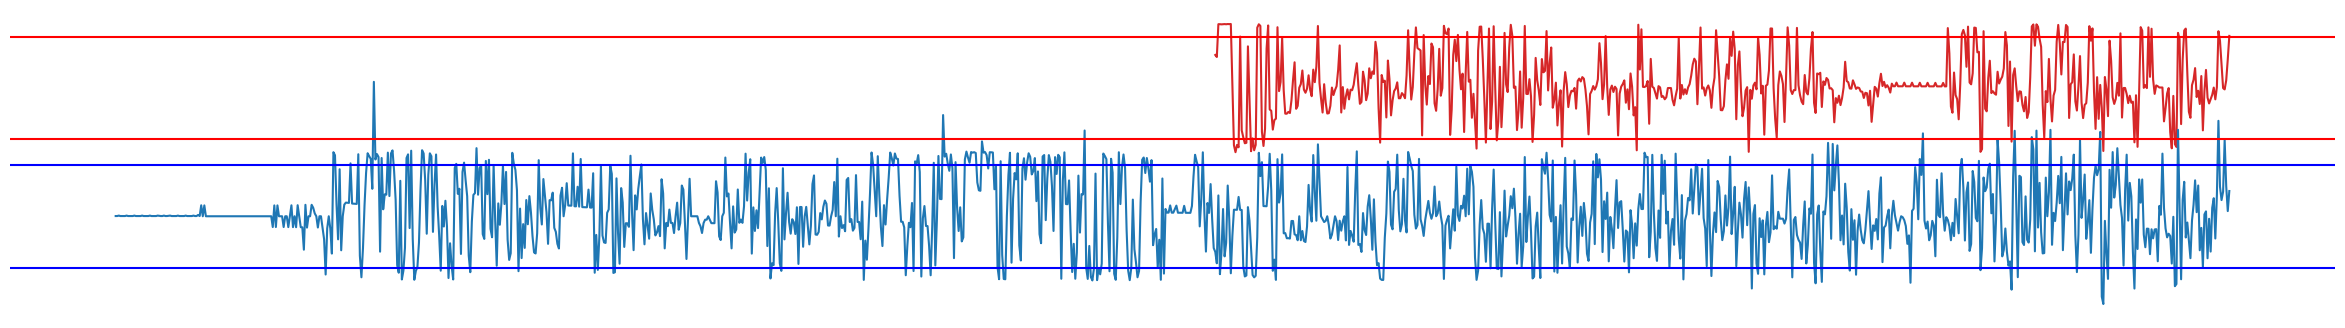

In [7]:
plot_stocks(df_price_return['booali'],df_price_return['ve_tejarat'])

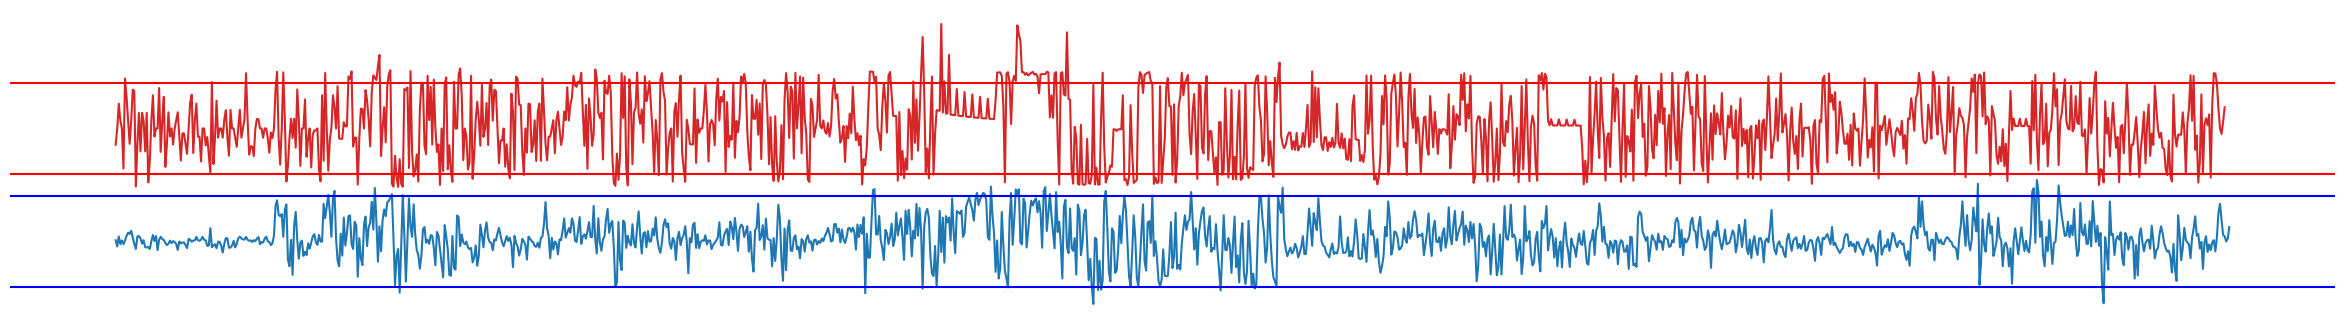

In [8]:

plot_stocks(df_price_return['khodro'],df_ind_return)

as you can see some stocks have been around less than others

## calculated distance/sim adjacency matrix

DTW stands for Dynamic Time Warping, which is a technique used to measure the similarity between two sequences of feature vectors. It is widely used in speech recognition, handwriting recognition, and music analysis.

The DTW algorithm finds the optimal matching between two sequences by warping the time axis of one sequence to match the other sequence. The cost of the matching is determined by comparing the distance between each pair of corresponding feature vectors in the two sequences. The optimal matching is found using dynamic programming to minimize the total cost.

Let $X$ and $Y$ be two sequences of feature vectors, where $x_i$ is the $i$th feature vector in sequence $X$, and $y_j$ is the $j$th feature vector in sequence $Y$. Let $\text{dist}(x_i, y_j)$ be the distance function that measures the distance between two feature vectors.

The DTW algorithm finds the optimal matching between $X$ and $Y$ using the following dynamic programming algorithm:

\begin{equation}
\text{DTW}(X,Y) = \min_{\text{path}} \sum_{(i,j)\in\text{path}} \text{dist}(x_i,y_j),
\end{equation}

where the minimum is taken over all possible paths, and the path is defined as a sequence of pairs $(i,j)$ that represents the corresponding feature vectors in $X$ and $Y$. The dynamic programming algorithm computes the minimum cost of the path that matches each prefix of $X$ to each prefix of $Y$.

The algorithm starts by initializing a cost matrix $C$ of size $(m+1) \times (n+1)$, where $m$ and $n$ are the lengths of $X$ and $Y$, respectively. The cost matrix $C_{i,j}$ stores the minimum cost of the path that matches $x_1,\ldots,x_i$ to $y_1,\ldots,y_j$.

The initialization is done as follows:

\begin{align}
C_{0,0} &= 0, \\
C_{i,0} &= \infty, \quad \text{for} \quad i=1,\ldots,m, \\
C_{0,j} &= \infty, \quad \text{for} \quad j=1,\ldots,n.
\end{align}

The first row and column are initialized to $\infty$ to ensure that only valid paths are selected in the minimum computation.

The rest of the cost matrix is computed using the following recurrence relation:

\begin{equation}
C_{i,j} = \text{dist}(x_i, y_j) + \min \{C_{i-1,j}, C_{i,j-1}, C_{i-1,j-1}\},
\end{equation}

where $\text{dist}(x_i, y_j)$ is the distance between the $i$th feature vector in $X$ and the $j$th feature vector in $Y$, and the minimum is taken over the three adjacent cells.

Finally, the optimal cost of the matching is given by $C_{m,n}$, which is the minimum cost of the path that matches the entire sequences $X$ and $Y$. The optimal path can be found by backtracking from $C_{m,n}$ to $C_{0,0}$ using the adjacent cells with the smallest cost. The resulting path represents the optimal matching between the two sequences.

we use exisinting repo https://github.com/wannesm/dtaidistance for DTW

I've already cloned this library to the exisitng directory

or you can run the code below to download it 

In [9]:
# !pip install git+https://github.com/wannesm/dtaidistance.git#egg=dtaidistance

all the modules needed for calculating distance is in distance.py file

In [10]:
%load_ext autoreload
%autoreload 1
%aimport distance

In [11]:
from distance import calc_edge,validate_adj,calc_multi_edge

ImportError: cannot import name 'calc_multi_edge' from 'distance' (e:\Research\PP_and_OP\Stock_Community_Detection\distance_detection\distance.py)

In [ ]:
size = len(df_price_return.columns)
adj = np.zeros((size,size))

The calc_edge function takes two series and also uses total_ind to returns a similarity score based on the given type. If the type is 1, it calculates a semi-correlation score between the two series based on their properties.

s = minimum lenght of the given two time series
1. For type = 1, the function iterates over s1, s2, and totindex in parallel, calling calc_proprty function on each tuple of values and calculating a semi_cor value based on the thresholds provided. The function returns the semi_cor value divided by s.
2. 
    - If the type is 2 or 3, it calculates the DTW distance between the two series, type two uses the dulfault euclidean distance between two point 
      while type 3 is customized for by the parameter explained below :
  `dtw.distance(s1.to_numpy(), s2.to_numpy(), window=4, inner_dist=my_dist(), penalty=1, use_pruning=True, only_ub=True, max_step=4)`
  my_dist() refers to a custom distance function that can be specified to define how the distance should be calculated between individual elements in the time series.
T   he parameters window and max_step define constraints on how far the algorithm is allowed to look back or forward in time to match corresponding elements in the two time series.        penalty is a scaling factor applied to the DTW distance.

    - The parameters use_pruning and only_ub refer to optimizations in the DTW algorithm that can significantly improve performance for longer time series. use_pruning enables pruning of candidate warping paths, while only_ub specifies that only the upper bound of the DTW distance should be computed. 

    - finally, the expression dtw.distance(s1.to_numpy(),s2.to_numpy(),window=4,inner_dist=my_dist(),penalty=1,use_pruning=True,only_ub=True,max_step=4)/s divides the DTW distance by the length of time series s. This normalization is commonly used to compare DTW distances between time series with different lengths and units, and scales the DTW distance to a value between 0 and 1.
3. If the type is 4, it calculates a distance score based on the difference between the two stocks also considering tot_ind,if most of the mraket follows the same pattern that days is not counted, normalized by the number of days.

4. f the type is 5, it calculates a distance score based on the absolute difference of the stock prices, normalized by the number of days.




this is a O(N^2) algorithm if the number of stocks gets doubeld the tun time becomes 4 time more than before

In [ ]:
for stock1 in df_price_return:
    for stock2 in df_price_return:
        i = (np.where(en_stock == stock1)[0])
        j = (np.where(en_stock == stock2)[0])
        type = 3
        if i>j:
            dist = calc_edge(df_price_return[stock1],df_price_return[stock2],type,df_ind_return.squeeze())
            adj[i,j] = dist
            adj[j,i] = dist
if type==1:
    np.fill_diagonal(adj,1)
else:
    np.fill_diagonal(adj,0)


In [61]:
max(adj.flatten())

8.557972262740395e+20

validate_adj : given a list of stocks and sim/dist mat type=0:dist or type=1:sim

it prints the most and least alike stocks

you also need to give the labe of stocks according to adj mat for name representation

In [72]:
validation_list = ['khodro','kh_sapa','foolad','fe_meli','ve_tejarat','vebe_sader','vebe_melat','booali','noori','sh_bandar','sh_teran','shapna','ke_chad','ke_gol','kh_bahman','kh_gostar','opal']
validate_adj(en_stock,adj,type=0,my_stock=validation_list)

khodro     is most like ['khodro' 'kh_sapa' 'kh_gostar' 'kh_bahman'] with distnaced of [0.         2.83163428 4.85877931 6.31743003]
khodro     is less like ['jam_pilen' 'kaveh' 'foolazh' 'kala'] with distnaced of [10.28961031 10.32637281 10.98236868 12.62180537]
-----------------------

kh_sapa    is most like ['kh_sapa' 'khodro' 'kh_gostar' 'kh_bahman'] with distnaced of [0.         2.83163428 5.22071812 6.04172043]
kh_sapa    is less like ['sh_abriz' 'kaveh' 'foolazh' 'kala'] with distnaced of [10.12359429 10.17780581 10.80243283 12.30932412]
-----------------------

foolad     is most like ['foolad' 'fe_meli' 'fe_khooz' 'ke_gol'] with distnaced of [0.         2.25115997 2.82493257 3.373508  ]
foolad     is less like ['kh_bahman' 'kh_zamia' 'kh_gostar' 'kala'] with distnaced of [ 8.75695138 10.53594127 10.61019161 10.70313525]
-----------------------

fe_meli    is most like ['fe_meli' 'foolad' 'fe_khooz' 've_ghadir'] with distnaced of [0.         2.25115997 3.64327955 3.86704779]
f

##